In [ ]:
with open('/Users/paolaantonicoli/Downloads/hash.txt') as f:
    for line in f:
        Registers(line.strip())
        
        
        

In [151]:
l[0].strip()

'844082e02a27ddee8d99ea1af94a2969'

# Hash Function

In [154]:
def HashingPaola(x):    
    decimal = int(x,16)
    x = np.array([int(i) for i in list(str(decimal))])
    coeff = np.random.randint(0, high = n, size = len(x))
    x = format(np.dot(x, coeff) % n, '032b') #65537 first prime number high than n..
    return x

In [153]:
from collections import defaultdict

b=11
m= 2**b 
M = defaultdict(lambda :-1)

def Registers(v):
    x = HashingPaola(v)
    j = int(str(x)[:b],2)
    rho_w = (x[b:]+str('1')).index('1')
    M[j] = max(M[j],rho_w)
    return M





In [146]:
def HyperLogLog(M):
    Z=(sum(2**-M[j] for j in M.keys()))**(-1)
    
    alpha = 0.139*(m**2)*Z


6

In [108]:
a = pd.read_csv("/Users/paolaantonicoli/Downloads/hash.txt", delimiter ="\t", names=["Title"],nrows=20000000)
a.head()

,Title
0,844082e02a27ddee8d99ea1af94a2969
1,ff96d6665b5c59d3a70bb8f2ba4f10be
2,b64a85884e2b159829331c19e05dbac9
3,1c8836719e84867c26ba2cfeb372c53d
4,b66f73ffd9008d9c99159e164261df51


In [113]:
b = a.drop_duplicates(subset=['Title'])

In [114]:
len(b)

20000000

In [ ]:
2000000

## Question 1

In [80]:
import numpy as np

n = 4294967311

def HashingPaola(x):    
    decimal = int(x,16)
    x = np.array([int(i) for i in list(str(decimal))])
    coeff = np.random.randint(0, high = n, size = len(x))
    x = format(np.dot(x, coeff) % n, '032b') #65537 first prime number high than n..
    return x

In [81]:
%%time
a2 = a.copy()
a2["Title"] = [HashingPaola(x) for x in a['Title']]

CPU times: user 5.28 s, sys: 62.5 ms, total: 5.34 s
Wall time: 5.4 s


In [82]:
a2['Lenghts']= [len(str(x)) for x in a2['Title']]


In [83]:
a2

,Title,Lenghts
0,10101001101100000001011110000001,32
1,01101111100011001010111100011100,32
2,10010100111000100111001111101110,32
3,11011101101011101111010010101001,32
4,11101110101111001011100101111001,32
...,...,...
199995,11011001100100001010000011110100,32
199996,01000111100101001100110011010100,32
199997,01010010010100110111111011110111,32
199998,00101110110111000100001110000011,32


In [184]:
#saving dict function
with open('HashingPaolita.pkl', 'wb') as f:
    pickle.dump(a2, f, pickle.HIGHEST_PROTOCOL)

## HyperLogLog

In [2]:
#load dict function
def load_obj():
    with open('HashingPaolita.pkl', 'rb') as f:
        return pickle.load(f)
    
f = load_obj()
f.head()

,Title
0,1000101111101001
1,0011011000001011
2,1111001000001000
3,1011011000111010
4,1001100011100111


In [116]:
lista = list(a2["Title"])

In [138]:
%%time
bucket_dt = pd.DataFrame(columns=['n. Bucket', 'ZerosCount'])

def split_bit(x):
    n_bucket = x[:3]
    ZerosCount = (x[3:]+str('1')).index('1')
    return [n_bucket, ZerosCount]

c_list = [split_bit(elem) for elem in lista]
bucket_dt["n. Bucket"] = [c[0] for c in c_list]
bucket_dt["ZerosCount"] = [c[1] for c in c_list]

CPU times: user 517 ms, sys: 69.3 ms, total: 586 ms
Wall time: 602 ms


In [141]:
b = pd.DataFrame()

In [143]:
bucket_dt.groupby('n. Bucket').median()

    
    
    

,ZerosCount
n. Bucket,
000,1
001,0
010,1
011,0
100,1
101,0
110,1
111,0


In [137]:
2**11

2048

In [139]:
bucket_dt

SyntaxError: invalid syntax (<ipython-input-139-900be98d5f4f>, line 1)

In [140]:
import matplotlib.pyplot as plt


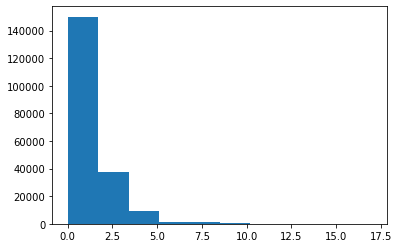

In [134]:
plt.hist(bucket_dt['ZerosCount'])
plt.show()